Group 3:<br>
-Lakshi Tyagi<br>
-Parth Shrivastava<br> 
-Rahul Singh<br>
-Franco Sanchez Torres

In [1]:
#Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import random
import math
%matplotlib inline

In [2]:
# 1. Expectation-Maximization (EM)
# Generating surrogate data for 3 coins
# Number of experiments
experiments = 5 # The smaller this number to worst the performance/estimate

# Number of coin tosses for each trial
coin_tosses = 25 # The smaller this number to worst the performance/estimate

# Experiment ground truth properties: Prob to choose coin A or B or C for the trial
pA = 0.33
pB = 0.33
pC = 1-pA - pB

# Coin ground truth properties: Prob for heads and tails for each coin
p_heads_A = 0.7
p_heads_B = 0.5
p_heads_C = 0.4

# Empty array where all tosses are stored
rolls= []

A_heads = 0
B_heads = 0
C_heads = 0
A_tails = 0
B_tails = 0
C_tails = 0

In [3]:
#Code for randomly selecting a coin & Heads or Tails
for i in range(0,experiments):
    trial = ""
    A=0
    B=0
    # Choose coin: p fixed for single trial
    if ( random.uniform(0, 1) < pA ): 
        p = p_heads_A
        A=1
        B=0
    elif ( random.uniform(0, 1) < pB ):
        p = p_heads_B
        A=0
        B=1
    else: 
        p = p_heads_C
        A=0
        B=0
        
    for j in range(0,coin_tosses):
        # generate outcome
        outcome = random.uniform(0, 1)
        if (outcome < p): 
            trial += "H"
            if (A==1): 
                A_heads += 1
            elif (B==1):
                B_heads += 1
            else:
                C_heads += 1
                
        else: 
            trial += "T"
            if (A==1): 
                A_tails += 1
            elif (B==1):
                B_tails += 1
            else:
                C_tails +=1
                
    rolls.append( trial ) 


In [4]:
#print entire outcome of experiment; all coin tosses     
print(rolls)

['TTHTTTHHHHTHHHTHTTTTTTHHH', 'TTTTTTHHTHTHHTHHTHHHTHTTH', 'THTTTHTHHHHTTTTTHTHTTTTTT', 'HTTHHTTHHTHTTHTHTHHTTHHHH', 'HTHTHHHTHTHHHHHHHHTTHHHHT']


In [5]:
# EM algorithm for 3 random coins
def coin_em(rolls, theta_A=None, theta_B=None, theta_C=None, max_iter=50): #add =50
    
    # Initial Guess
    theta_A = theta_A or random.random() #take value or random between 0 and 1
    theta_B = theta_B or random.random()
    theta_C = theta_C or random.random()
    
    # theta vector
    thetas = [(theta_A, theta_B, theta_C)]
    
    # Iterate
    for i in range(max_iter):
        print("#%d:\t%0.4f %0.4f  %0.4f" % (i, theta_A, theta_B, theta_C)) #significant digits 
        #print(round(variable, 3))
        heads_A, tails_A, heads_B, tails_B, heads_C, tails_C = e_step( rolls, theta_A, theta_B, theta_C )
        theta_A, theta_B, theta_C = m_step( heads_A, tails_A, heads_B, tails_B, heads_C, tails_C )
        thetas.append((theta_A,theta_B,theta_C))
    
    return thetas, (theta_A,theta_B,theta_C) #thetas are conveniently needed for a unnecessary plot at the end

In [6]:
# Compute expected value for Heads and Tails for all 3 coins over rolls given coin biases
def e_step( rolls, theta_A, theta_B,theta_C ):
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    heads_C, tails_C = 0,0
    
    for trial in rolls:
        likelihood_A = coin_likelihood( trial, theta_A )
        likelihood_B = coin_likelihood( trial, theta_B )
        likelihood_C = coin_likelihood( trial, theta_C )
        p_A = likelihood_A / ( likelihood_A + likelihood_B + likelihood_C)
        p_B = likelihood_B / ( likelihood_A + likelihood_B + likelihood_C )
        p_C = likelihood_C / ( likelihood_A + likelihood_B + likelihood_C )
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
        heads_C += p_C * trial.count("H")
        tails_C += p_C * trial.count("T") 
        
    return heads_A, tails_A, heads_B, tails_B, heads_C, tails_C

In [7]:
# M step: Compute values for theta that maximize the likelihood of expected number of heads/tails
def m_step(heads_A, tails_A, heads_B, tails_B, heads_C, tails_C):
    
    theta_A = np.divide( heads_A, heads_A + tails_A ) #np.divide avoids divby0s
    theta_B = np.divide( heads_B, heads_B + tails_B )
    theta_C = np.divide( heads_C, heads_C + tails_C )
    
    return theta_A, theta_B, theta_C

In [8]:
# p(X | Z, theta)
def coin_likelihood(roll, bias):
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

In [9]:
# Call EM
thetas , _  = coin_em( rolls, 0.8, 0.4, 0.5, max_iter=15 )

print("Chosen ground truth (which is sample-independent!): ")
print("%0.6f %0.6f %0.6f" % (p_heads_A, p_heads_B, p_heads_C))
print("MLE estimates from data (finite sample size estimates are the theoretical optimum!):")

MLE_pA, MLE_pB, MLE_pC = m_step( A_heads, A_tails, B_heads, B_tails, C_heads, C_tails )
print("%0.6f %0.6f %0.6f" % (MLE_pA, MLE_pB, MLE_pC))
print(round(MLE_pA,3), round(MLE_pB,3), round(MLE_pC,3))

#0:	0.8000 0.4000  0.5000
#1:	0.7155 0.4242  0.5036
#2:	0.6851 0.4296  0.4936
#3:	0.6676 0.4318  0.4853
#4:	0.6571 0.4335  0.4794
#5:	0.6510 0.4352  0.4751
#6:	0.6475 0.4368  0.4719
#7:	0.6455 0.4383  0.4695
#8:	0.6445 0.4397  0.4675
#9:	0.6440 0.4410  0.4658
#10:	0.6437 0.4422  0.4644
#11:	0.6437 0.4433  0.4631
#12:	0.6436 0.4443  0.4620
#13:	0.6437 0.4451  0.4611
#14:	0.6437 0.4459  0.4602
Chosen ground truth (which is sample-independent!): 
0.700000 0.500000 0.400000
MLE estimates from data (finite sample size estimates are the theoretical optimum!):
0.720000 0.560000 0.426667
0.72 0.56 0.427


In [10]:
# plot EM convergence
def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    zvals = np.linspace(0.01,0.99,100)
    X,Y,D = np.meshgrid(xvals, yvals, zvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            # Trying to calculate the marginal likelihood of X given thetas
            z.append(coin_marginal_likelihood(rolls,c,Y[i][j],D[i][j]))
        Z.append(z)  
    # plot
    plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    # cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B,\theta_C)$", fontsize=20)
    ax.set_xlabel(r"$\theta_A$", fontsize=20)
    ax.set_ylabel(r"$\theta_B$", fontsize=20)
    ax.set_zlabel(r"$\theta_C$", fontsize=20)
    
    
    # plot thetas   
    if thetas is not None:
        # Data for three-dimensional scattered points & llines
        # Points
        thetas = np.array(thetas)    
        xdata = thetas[:,0]
        ydata = thetas[:,1]
        zdata = thetas[:,2]
        ax.scatter3D(xdata, ydata, zdata, c='blue');
        # Line
        ax.plot3D(xdata, ydata, zdata, 'blue')
        # Change view angle
        # Default values: elev=30, azim=- 60
        ax.view_init(elev=30,azim=-60)
    
# log P(X | theta), only used for plot
def coin_marginal_likelihood( rolls, biasA, biasB, biasC):
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        likelihoodC = coin_likelihood(roll, biasC)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB + likelihoodC))) 
    return sum(trials)

How EM got there...


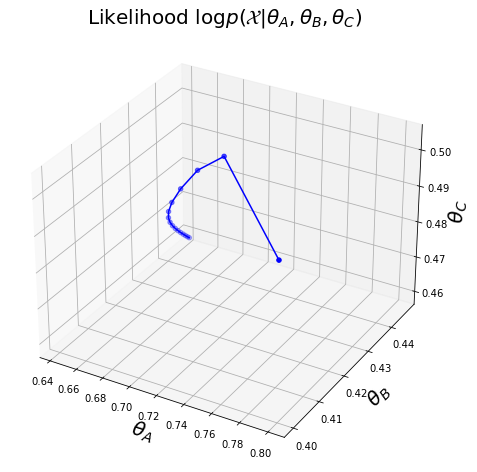

In [11]:
print("How EM got there...")
plot_coin_likelihood(rolls, thetas)

Take home: Even when we do not have many iterations of the EM algorithm, it works quite well. As we can see in the 3D plot, within a few iterations we get a good estimate of our parameters. It starts to converge to its local optimal value.

# 2 Unlucky Optimization Competition 

In [12]:
#EM algorithm
def coin_em(rolls, theta_A=None, theta_B=None, max_iter=50): #add =50
    
    # Initial Guess
    theta_A = theta_A or random.random() #take value or start wild between 0 and 1
    theta_B = theta_B or random.random()
    
    # theta vector
    thetas = [(theta_A, theta_B)]
    
    # Iterate
    for i in range(max_iter):
        #print("#%d:\t%0.4f %0.4f" % (i, theta_A, theta_B)) #significant digits 
        #print(round(variable, 3))
        heads_A, tails_A, heads_B, tails_B = e_step( rolls, theta_A, theta_B )
        theta_A, theta_B = m_step( heads_A, tails_A, heads_B, tails_B )
        thetas.append((theta_A,theta_B))
    
    return thetas, (theta_A,theta_B) #thetas are conveniently needed for a unnecessary plot at the end

# Compute expected value for heads_A, tails_A, heads_B, tails_B over rolls given coin biases
def e_step( rolls, theta_A, theta_B ):
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    
    for trial in rolls:
        likelihood_A = coin_likelihood( trial, theta_A )
        likelihood_B = coin_likelihood( trial, theta_B )
        p_A = likelihood_A / ( likelihood_A + likelihood_B )
        p_B = likelihood_B / ( likelihood_A + likelihood_B )
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
        
    return heads_A, tails_A, heads_B, tails_B

# M step: Compute values for theta that maximize the likelihood of expected number of heads/tails
def m_step(heads_A, tails_A, heads_B, tails_B):
    
    theta_A = np.divide( heads_A, heads_A + tails_A ) #np.divide avoids divby0s
    theta_B = np.divide( heads_B, heads_B + tails_B )
    
    return theta_A, theta_B

# p(X | Z, theta)
def coin_likelihood(roll, bias):
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

In [13]:
#Dictionary to store repetition data 
seed = {}
seed['rolls'] = []
seed['MLEA'] = []
seed['MLEB'] = []
seed['Score'] = []

In [14]:
#Loop performing 125 coin tosses a hundred thousand times
for i in range(100000):
    experiments = 5 
    coin_tosses = 25 
    pA = 0.5
    pB = 1-pA
# Coin ground truth properties: Prob for heads and tails
    p_heads_A = 0.9
    p_heads_B = 0.1

# empty array where all tosses are stored
    rolls= []

    A_heads = 0
    B_heads = 0
    A_tails = 0
    B_tails = 0

    for i in range(0,experiments):
        trial = ""
        A=0
    # Choose coin: p fixed for single trial
        if ( random.uniform(0, 1) < pA ): 
            p = p_heads_A
            A=1
        else:
            p = p_heads_B
            A=0
        
        for j in range(0,coin_tosses):
        # generate outcome
            outcome = random.uniform(0, 1)
            if (outcome < p): 
                trial += "H"
                if (A==1): 
                    A_heads += 1
                else:
                    B_heads += 1
            else: 
                trial += "T"
                if (A==1): 
                    A_tails += 1
                else:
                    B_tails += 1
        rolls.append( trial ) 
        
        

# Call EM
    thetas , _  = coin_em( rolls, 0.9, 0.1, max_iter=15 )

    MLE_pA, MLE_pB = m_step( A_heads, A_tails, B_heads, B_tails )
    #print("%0.6f %0.6f" % (MLE_pA, MLE_pB))
    #print(round(MLE_pA,3), round(MLE_pB,3))
    
    score = min(abs(np.log(MLE_pA/p_heads_A)),abs(np.log(MLE_pB/p_heads_B)))

    seed["rolls"].append(rolls)
    seed['MLEA'].append(MLE_pA)
    seed['MLEB'].append(MLE_pB)
    seed['Score'].append(score)

<ipython-input-12-58049aff38c4>:42: RuntimeWarning: invalid value encountered in true_divide
  theta_A = np.divide( heads_A, heads_A + tails_A ) #np.divide avoids divby0s
<ipython-input-12-58049aff38c4>:43: RuntimeWarning: invalid value encountered in true_divide
  theta_B = np.divide( heads_B, heads_B + tails_B )
<ipython-input-14-2b9ae8038059>:56: RuntimeWarning: divide by zero encountered in log
  score = min(abs(np.log(MLE_pA/p_heads_A)),abs(np.log(MLE_pB/p_heads_B)))


In [15]:
#Finding and printing best Score value conditions
Max_Score_Index = seed['Score'].index(max(seed.get('Score')))


print("Highest Score Value ")
print(seed['Score'][Max_Score_Index])
print("\n" )
print("MLE Estimates")
print("%0.6f %0.6f" % (seed['MLEA'][Max_Score_Index],seed['MLEB'][Max_Score_Index]))
print("\n" )
print("Coin Tosses")
print(seed['rolls'][Max_Score_Index]) 

Highest Score Value 
0.40546510810816444


MLE Estimates
0.600000 0.050000


Coin Tosses
['TTTTTTTTTTTTTTTTTTTTTTTTT', 'TTTTTTTTTTTTTTTTHTHTTTTHT', 'TTTTTTTTTTTTTTTTTTTTTTTTT', 'HHHTHHHTHTHTHTTHHTHTHHHTT', 'TTTTTTTTTTTTTTHTTTTTTTTTH']


Our initial probabilities were 0.9 and 0.1. However, after many iterations it got revised to 0.6 and 0.05 respectively.